In [7]:
module GlobalKfWorld

using Plots
using Distributions
using StatsBase
using LinearAlgebra
using Printf
using Logging
Logging.disable_logging(Logging.Info)

include("../scripts/kf.jl")
import .KfWorld: RealRobot, RealCamera
import .KfWorld: EstimationAgent, IdealAgent, Agent, Landmark, Map, Camera, Robot, World
import .KfWorld: data, decision, state_transition, circle_shape, draw, append
import .KfWorld: observation_function
import .KfWorld: Estimator, KalmanFilter, motion_update, observation_update

mutable struct GlobalKalmanFilter <: Estimator
    init_pose::Array{Float64}
    map::Map
    belief::MvNormal
    motion_noise_stds::Dict
    pose::Array{Float64}
    distance_dev_rate::Float64
    direction_dev::Float64

    function GlobalKalmanFilter(
        ;init_pose=[0.0, 0.0, 0.0],
        map=Map(),
        belief = MvNormal([0, 0, 0], diagm([1e+4, 1e+4, 1e+4])),
        motion_noise_stds=Dict([("nn", 0.19), ("no", 0.001), ("on", 0.13), ("oo", 0.2)]),
        pose = mean(belief),
        distance_dev_rate=0.14,
        direction_dev=0.05
        )
        
        new(
            init_pose,
            map,
            belief,
            motion_noise_stds,
            pose,
            distance_dev_rate,
            direction_dev
        )
    end

end

end

Main.GlobalKfWorld

Plots.AnimatedGif("/home/szmlb/workspace/github/code-practice/julia/detailed_probo/src/section_advanced_localization/tmp.gif")
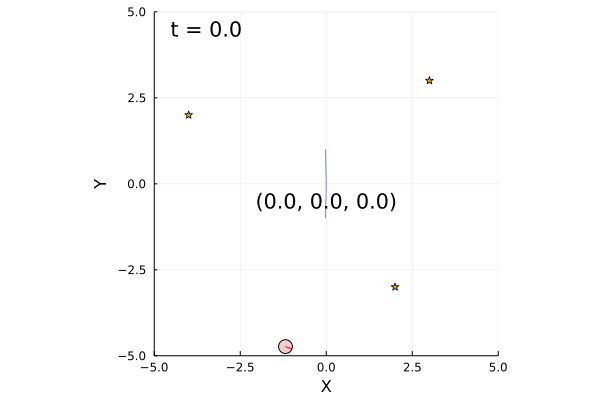

In [10]:
using .GlobalKfWorld
using Distributions

function trial(animation=true)
    time_interval = 0.1    
    world = GlobalKfWorld.World(30, 0.1)

    ### 地図を生成して2つランドマークを追加 ###
    m = GlobalKfWorld.Map()
    GlobalKfWorld.append(m, GlobalKfWorld.Landmark([-4, 2]))
    GlobalKfWorld.append(m, GlobalKfWorld.Landmark([2, -3]))
    GlobalKfWorld.append(m, GlobalKfWorld.Landmark([3, 3]))
    GlobalKfWorld.append(world, m)
    
    initial_pose = [rand(Uniform(-5, 5)), rand(Uniform(-5, 5)), rand(Uniform(-pi, pi))]
    kf = GlobalKfWorld.GlobalKalmanFilter(map=m)
    a = GlobalKfWorld.EstimationAgent(time_interval, 0.2, 10.0/180.0*pi, kf)
    r = GlobalKfWorld.RealRobot(initial_pose, :red, 0.2, a, sensor=GlobalKfWorld.RealCamera(m))
    GlobalKfWorld.append(world, r)

    GlobalKfWorld.draw(world)

end

trial(false)